## Car Price Linear Regression Assignment

### Importing and Understanding Data

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn theme if you prefer
sns.set()

In [52]:
# Importing Housing.csv
car = pd.read_csv('CarPrice_Assignment.csv')
df=car.copy()

In [53]:
# Looking at the first five rows
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [6]:
df.shape
#205 rows -  notenough data to test and train the model

(205, 26)

In [54]:
df= df.drop_duplicates(keep='first')

In [39]:
df.info()
#No null values or duplicates

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [55]:
# Create function to check distribution/ variation in each column - name, unique values, isnull, dtype
def unique_col_values(d):
    for column in d:
        print("{}  | {} | {} | {} ".format(d[column].name, len(d[column].unique()), d[column].isnull().sum(), d[column].dtype))
        
unique_col_values(df)

car_ID  | 205 | 0 | int64 
symboling  | 6 | 0 | int64 
CarName  | 147 | 0 | object 
fueltype  | 2 | 0 | object 
aspiration  | 2 | 0 | object 
doornumber  | 2 | 0 | object 
carbody  | 5 | 0 | object 
drivewheel  | 3 | 0 | object 
enginelocation  | 2 | 0 | object 
wheelbase  | 53 | 0 | float64 
carlength  | 75 | 0 | float64 
carwidth  | 44 | 0 | float64 
carheight  | 49 | 0 | float64 
curbweight  | 171 | 0 | int64 
enginetype  | 7 | 0 | object 
cylindernumber  | 7 | 0 | object 
enginesize  | 44 | 0 | int64 
fuelsystem  | 8 | 0 | object 
boreratio  | 38 | 0 | float64 
stroke  | 37 | 0 | float64 
compressionratio  | 32 | 0 | float64 
horsepower  | 59 | 0 | int64 
peakrpm  | 23 | 0 | int64 
citympg  | 29 | 0 | int64 
highwaympg  | 30 | 0 | int64 
price  | 189 | 0 | float64 


In [10]:
df.cylindernumber  .value_counts()
#Explore the count of features with few uniuq counts one by one. Add it to data dictionary file

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [11]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [12]:
df.describe(include=["O"])  #Describe categorical data

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


### Data Preparation

In [56]:
#Add a column name car company
df['car_co']=df['CarName'].str.split().str.get(0)
set(df['car_co'])
#Observe few typos

{'Nissan',
 'alfa-romero',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'maxda',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porcshce',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'toyouta',
 'vokswagen',
 'volkswagen',
 'volvo',
 'vw'}

In [57]:
#Fix the typos
df['car_co']=df['car_co'].replace({'maxda': 'mazda','porcshce':'porsche','toyouta': 'toyota','vw':'volkswagen', 'vokswagen': 'volkswagen','Nissan': 'nissan' })
set(df['car_co'])

{'alfa-romero',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo'}

In [58]:
df['car_v']=df['CarName'].str.split().str.get(1) #car variant name
(df['car_v'])
#There seems no gain in categorizing several car variant name.

0            giulia
1           stelvio
2      Quadrifoglio
3               100
4             100ls
5               fox
6             100ls
7              5000
8              4000
9             5000s
10             320i
11             320i
12               x1
13               x3
14               z4
15               x4
16               x5
17               x3
18           impala
19            monte
20             vega
21          rampage
22       challenger
23             d200
24           monaco
25             colt
26             colt
27          coronet
28             dart
29          coronet
           ...     
175          corona
176         corolla
177            mark
178         corolla
179          corona
180         starlet
181          tercel
182          rabbit
183            1131
184           model
185            type
186             411
187           super
188          dasher
189          dasher
190          rabbit
191          rabbit
192          rabbit
193          dasher


## Univariate and Bivariate Analysis - Data visualization

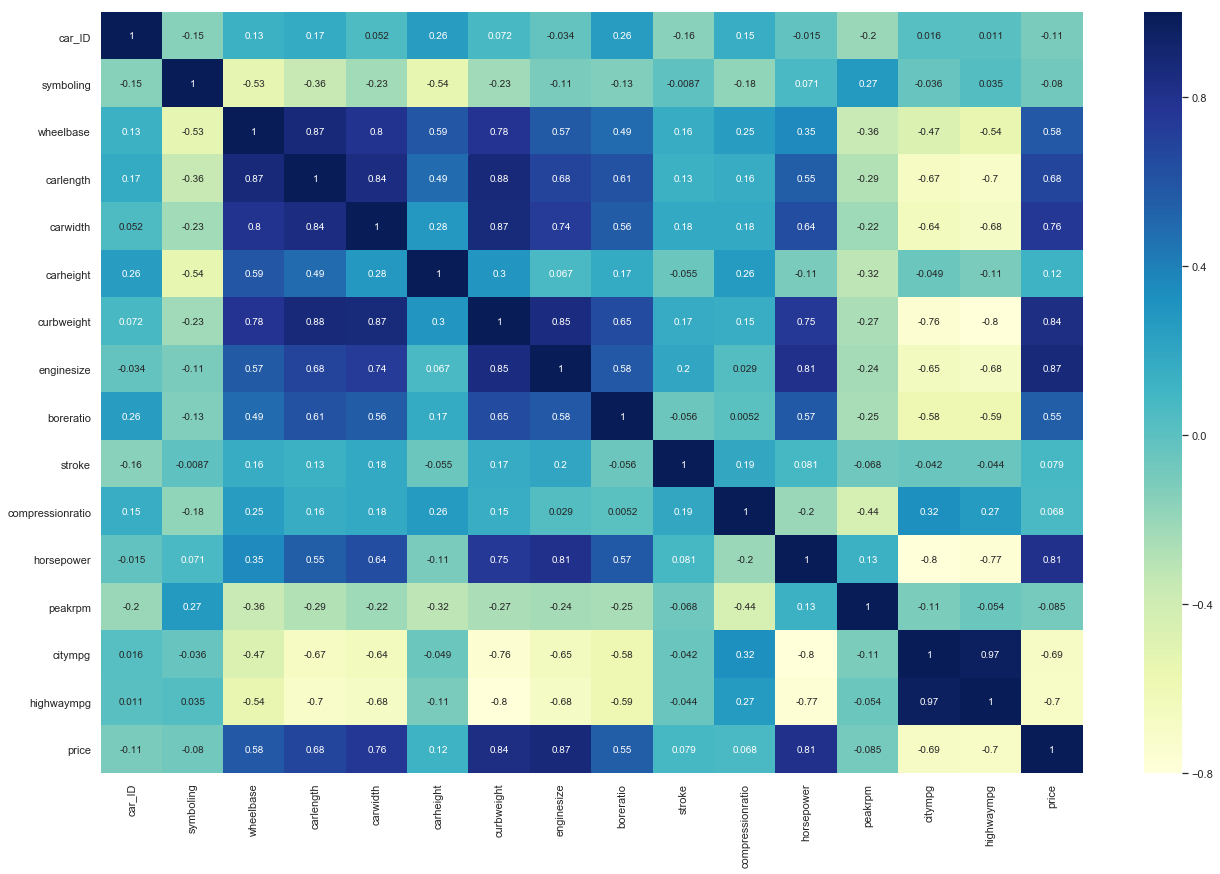

In [16]:
plt.figure(figsize = (22, 14))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

#Price is correlated to car size/ dimensions like length, width etc except height. It is also corelated to enginesize, boreratio, horsepower.
#Surprizingly is inversely corelated to mpg/ mileage unlike countries where fuel is expensive.
#There is high correlation between the predictors. Since this is highly correlated data we need to drop related features.

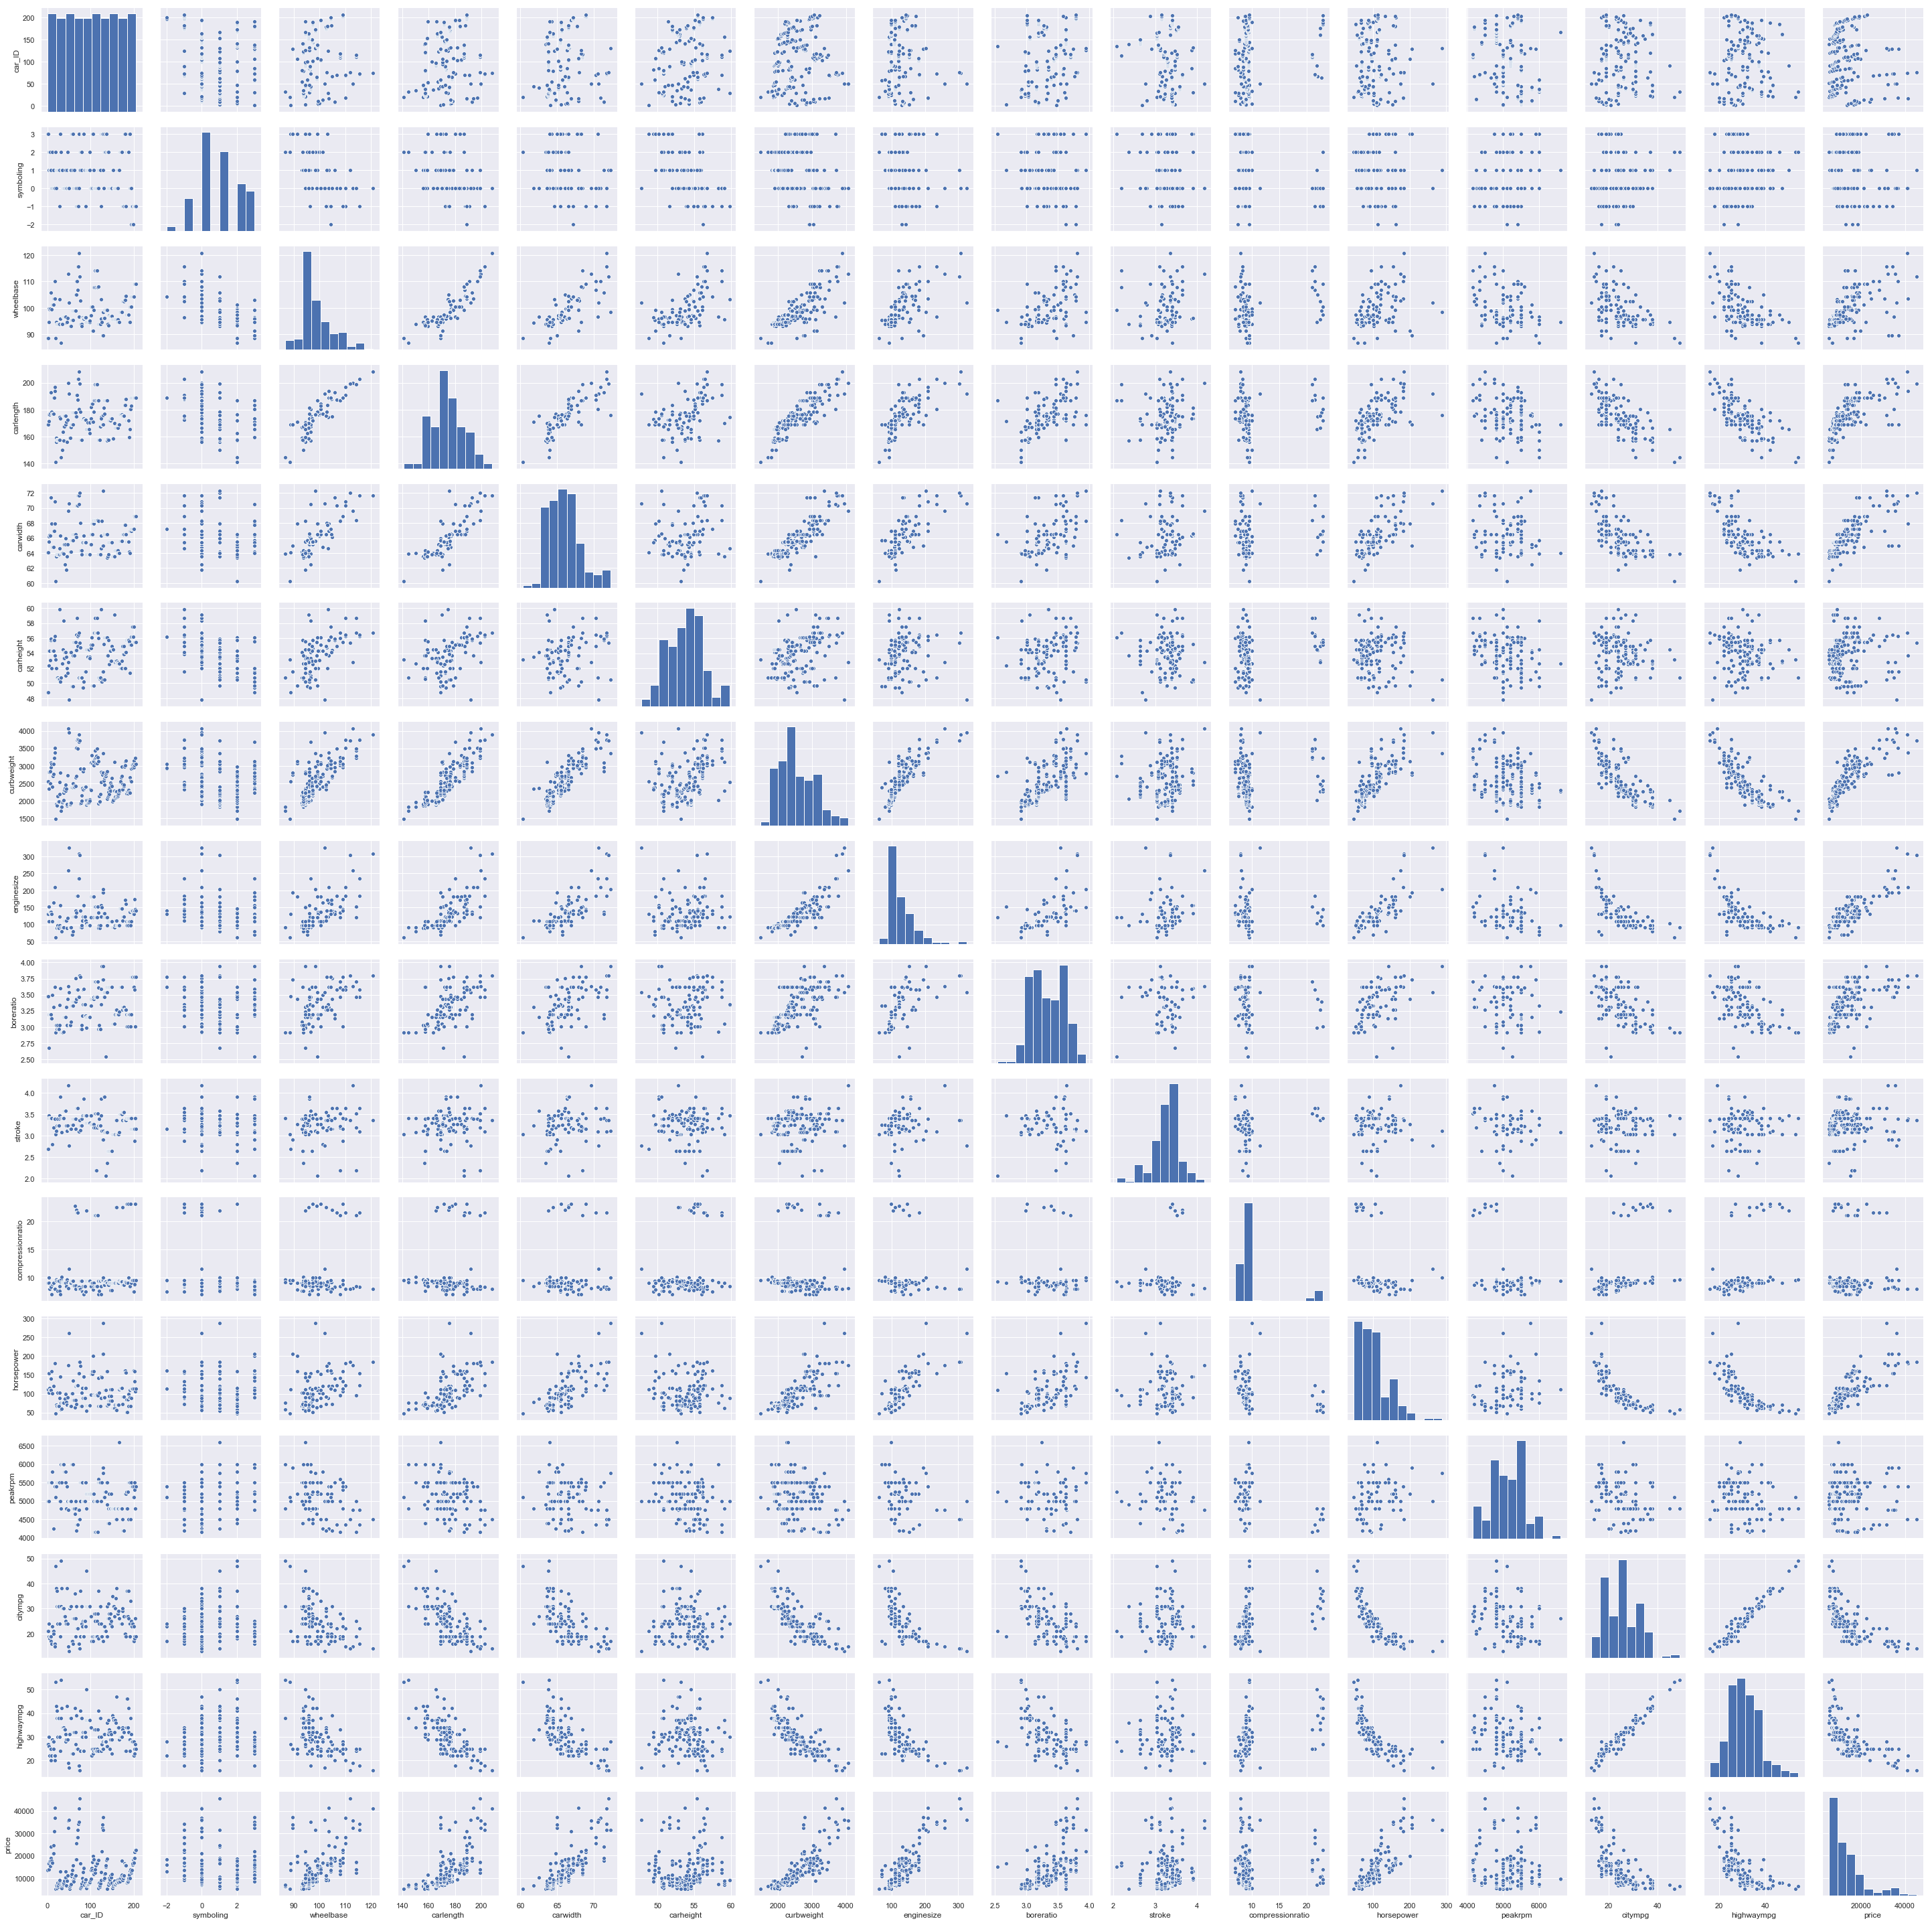

In [18]:
sns.pairplot(df)
plt.show()
plt.rcParams.update({'font.size': 22})

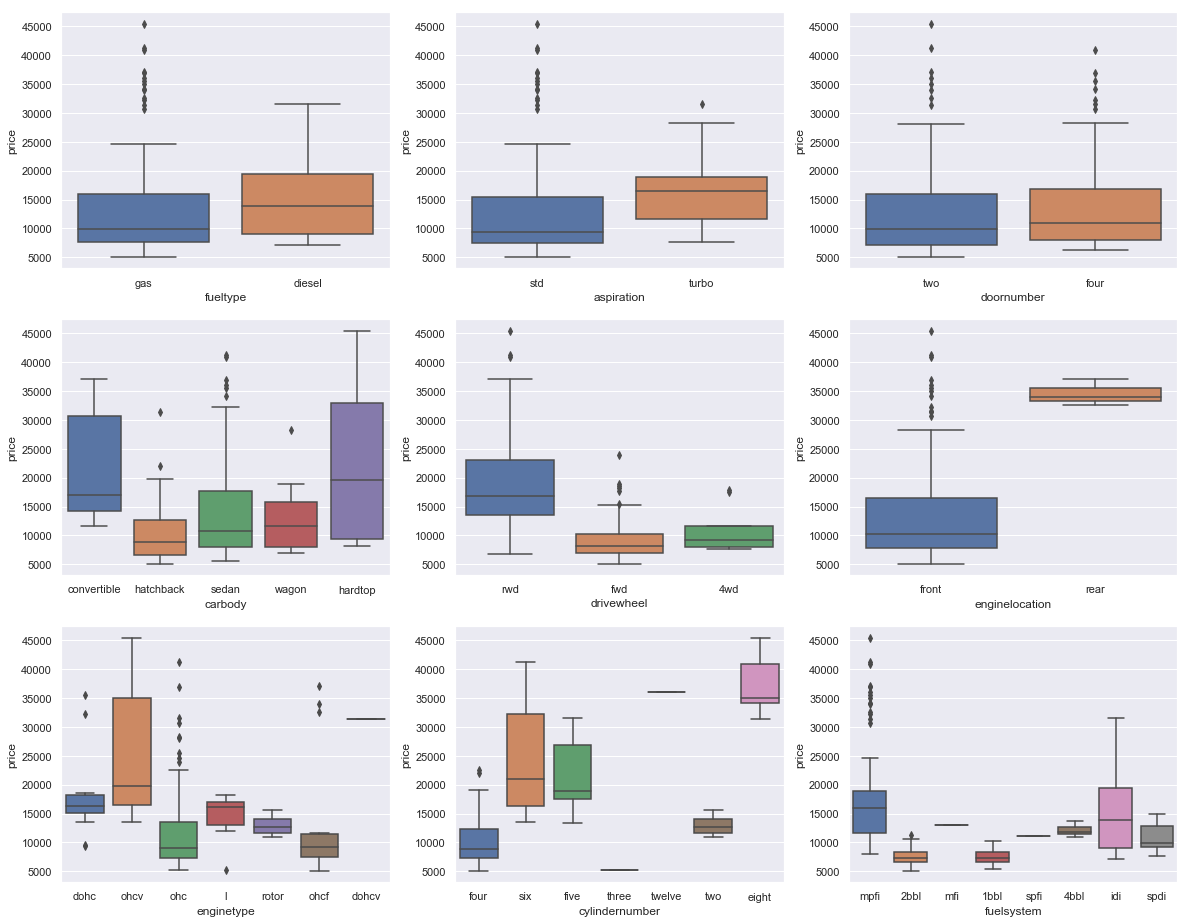

In [19]:
plt.figure(figsize=(20, 16))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.show()

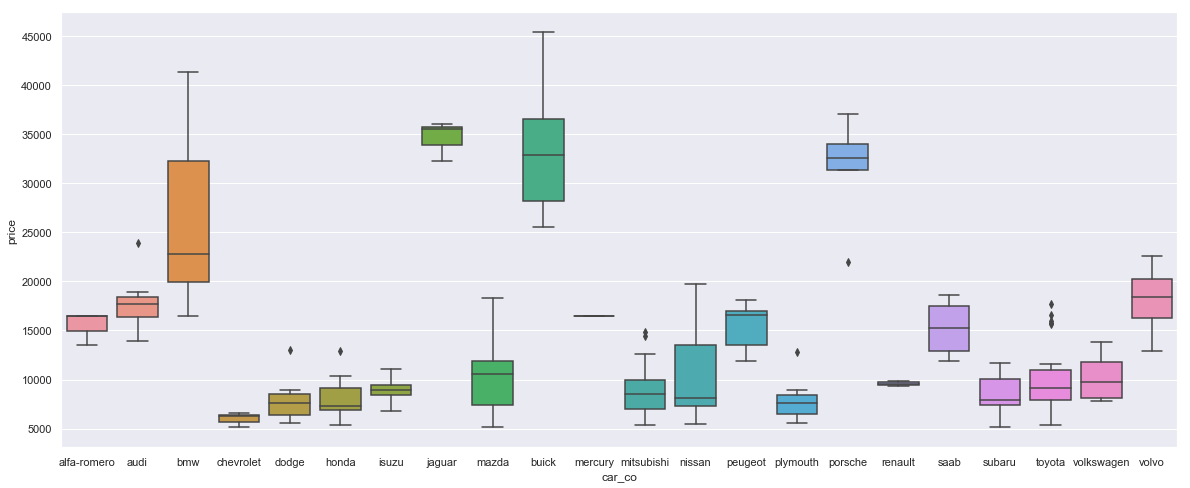

In [20]:
plt.figure(figsize=(20, 8))

sns.boxplot(x = 'car_co', y = 'price', data = df)

In [21]:
#HIgh variation of prices between car caompanies

In [22]:
round(df.car_co.value_counts()*100/df.car_co.value_counts().sum(),2)
#Some premium companies although with few cars have highly priced card like BMW, Buick, Porche, Jaguar etc

toyota         15.61
nissan          8.78
mazda           8.29
honda           6.34
mitsubishi      6.34
subaru          5.85
volkswagen      5.85
peugeot         5.37
volvo           5.37
dodge           4.39
buick           3.90
bmw             3.90
plymouth        3.41
audi            3.41
saab            2.93
porsche         2.44
isuzu           1.95
alfa-romero     1.46
jaguar          1.46
chevrolet       1.46
renault         0.98
mercury         0.49
Name: car_co, dtype: float64

In [23]:
round(df.cylindernumber.value_counts()*100/df.cylindernumber.value_counts().sum(),2)


four      77.56
six       11.71
five       5.37
eight      2.44
two        1.95
three      0.49
twelve     0.49
Name: cylindernumber, dtype: float64

In [24]:
round(car.enginetype.value_counts()*100/car.enginetype.value_counts().sum(),2)


ohc      72.20
ohcf      7.32
ohcv      6.34
l         5.85
dohc      5.85
rotor     1.95
dohcv     0.49
Name: enginetype, dtype: float64

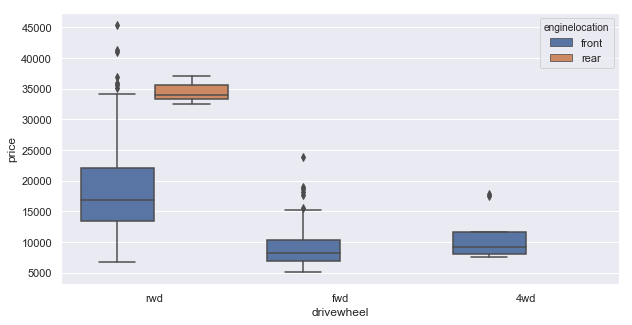

In [25]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'drivewheel', y = 'price', hue = 'enginelocation', data = df)
plt.show()

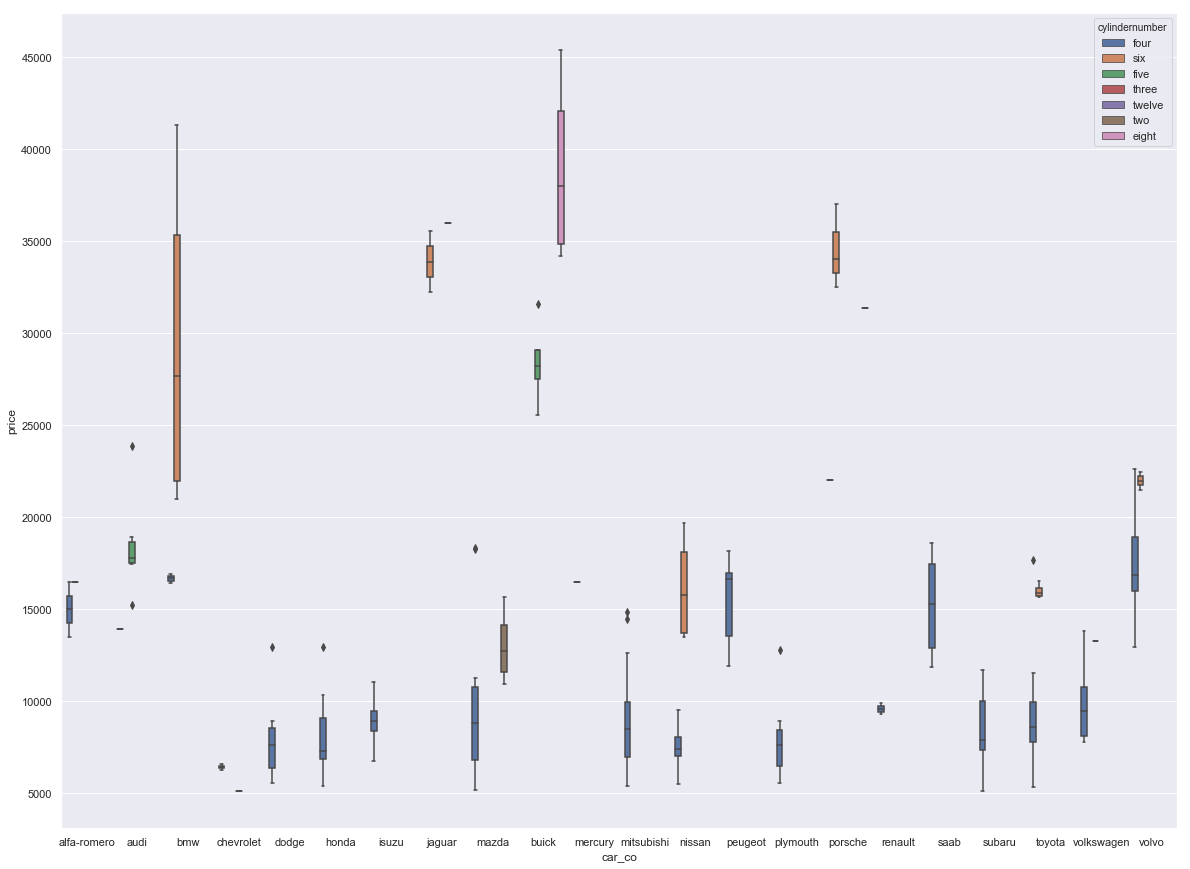

In [26]:
plt.figure(figsize = (20, 15))
sns.boxplot(x = 'car_co', y = 'price', hue = 'cylindernumber', data = df)
plt.show()

## Data preparation for modelling

MPG
City and high MPG are highly correlated. I will use a average MPG

In [59]:
df['mpg']= (df.citympg+df.highwaympg)/2
df.head()
#Avg MPG - derived

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_co,car_v,mpg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia,24.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio,24.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio,22.5
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,audi,100,27.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,audi,100ls,20.0


In [60]:
df.drop(['citympg','highwaympg'], axis =1, inplace = True)

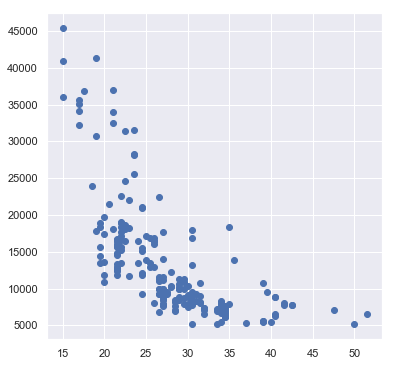

In [61]:
plt.figure(figsize=[6,6])
plt.scatter(df.mpg, df.price)

In [62]:
df['aspect']=df['wheelbase']/df['carheight']
#Derived column proxy for aspect ratio. 
#High number means high wheelbase and short - faster/ agile cars. Low number is low wheelbase and tall cars - boxy slower family cars


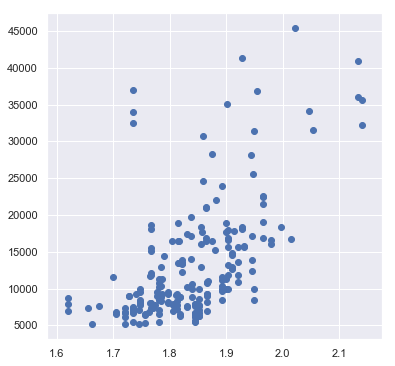

In [64]:
plt.figure(figsize=[6,6])
plt.scatter(df.aspect, df.price)

Length

From the above heatmap I see high correlation between car 'size' attributes like length, width, wheelbase and curb weight.  North America segments their vehicle in classes by Volume on similar lines India segments on basis of car length.

I will use only car length and drop other heavily correlated features

Ref: https://en.wikipedia.org/wiki/Vehicle_size_class

In [65]:
df.drop(['carwidth','curbweight','wheelbase'], axis =1, inplace = True)

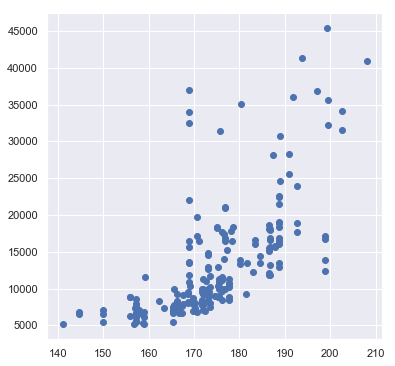

In [66]:
plt.figure(figsize=[6,6])
plt.scatter(df.carlength, df.price)
#Observe good linear behavour at small size cars which changes are at bigger size around length=165

Engine size and Horse Power
Both features are highly correlated. Hence dropping one


In [67]:
df.drop('horsepower', axis =1, inplace = True)

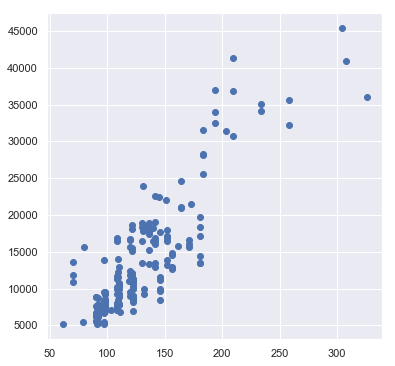

In [70]:
plt.figure(figsize=[6,6])
plt.scatter(df.enginesize, df.price)

# Convert categorical to numerical number

In [71]:
#Check all object columns. 
obj_col=(df.select_dtypes(include=['object']).columns)
unique_col_values(df[obj_col])

CarName  | 147 | 0 | object 
fueltype  | 2 | 0 | object 
aspiration  | 2 | 0 | object 
doornumber  | 2 | 0 | object 
carbody  | 5 | 0 | object 
drivewheel  | 3 | 0 | object 
enginelocation  | 2 | 0 | object 
enginetype  | 7 | 0 | object 
cylindernumber  | 7 | 0 | object 
fuelsystem  | 8 | 0 | object 
car_co  | 22 | 0 | object 
car_v  | 115 | 2 | object 


In [72]:
#Convert columns to numrerical  where columns have two unique options - binary. 
df['fueltype']=df['fueltype'].replace({'gas': 1, 'diesel': 0})
df['aspiration']=df['aspiration'].replace({'std': 1, 'turbo': 0})
df['doornumber']=df['doornumber'].replace({'two': 1, 'four': 0})
df['enginelocation']=df['enginelocation'].replace({'front': 1, 'rear': 0})
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,...,fuelsystem,boreratio,stroke,compressionratio,peakrpm,price,car_co,car_v,mpg,aspect
0,1,3,alfa-romero giulia,1,1,1,convertible,rwd,1,168.8,...,mpfi,3.47,2.68,9.0,5000,13495.0,alfa-romero,giulia,24.0,1.815574
1,2,3,alfa-romero stelvio,1,1,1,convertible,rwd,1,168.8,...,mpfi,3.47,2.68,9.0,5000,16500.0,alfa-romero,stelvio,24.0,1.815574
2,3,1,alfa-romero Quadrifoglio,1,1,1,hatchback,rwd,1,171.2,...,mpfi,2.68,3.47,9.0,5000,16500.0,alfa-romero,Quadrifoglio,22.5,1.803435
3,4,2,audi 100 ls,1,1,0,sedan,fwd,1,176.6,...,mpfi,3.19,3.40,10.0,5500,13950.0,audi,100,27.0,1.837937
4,5,2,audi 100ls,1,1,0,sedan,4wd,1,176.6,...,mpfi,3.19,3.40,8.0,5500,17450.0,audi,100ls,20.0,1.830571


In [73]:
#Check all object columns 
obj_col=(df.select_dtypes(include=['object']).columns)
unique_col_values(df[obj_col])

CarName  | 147 | 0 | object 
carbody  | 5 | 0 | object 
drivewheel  | 3 | 0 | object 
enginetype  | 7 | 0 | object 
cylindernumber  | 7 | 0 | object 
fuelsystem  | 8 | 0 | object 
car_co  | 22 | 0 | object 
car_v  | 115 | 2 | object 


In [74]:
df.drop(['car_v','CarName','car_ID'], axis =1, inplace = True)
#Remove features we dont need like car name and car id as we have already extract comparny/ brand

In [75]:
df = pd.get_dummies(df)
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,car_co_nissan,car_co_peugeot,car_co_plymouth,car_co_porsche,car_co_renault,car_co_saab,car_co_subaru,car_co_toyota,car_co_volkswagen,car_co_volvo
0,3,1,1,1,1,168.8,48.8,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,1,1,168.8,48.8,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,171.2,52.4,152,2.68,3.47,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,0,1,176.6,54.3,109,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,0,1,176.6,54.3,136,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0


In [150]:
df.info()
#67 columns and all are numerical

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 67 columns):
symboling                205 non-null int64
fueltype                 205 non-null int64
aspiration               205 non-null int64
doornumber               205 non-null int64
enginelocation           205 non-null int64
carlength                205 non-null float64
carheight                205 non-null float64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
peakrpm                  205 non-null int64
price                    205 non-null float64
mpg                      205 non-null float64
aspect                   205 non-null float64
carbody_convertible      205 non-null uint8
carbody_hardtop          205 non-null uint8
carbody_hatchback        205 non-null uint8
carbody_sedan            205 non-null uint8
carbody_wagon            205 non-null uint8

## Splitting the Data into Training and Testing Sets

In [151]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [152]:
df_test.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,car_co_nissan,car_co_peugeot,car_co_plymouth,car_co_porsche,car_co_renault,car_co_saab,car_co_subaru,car_co_toyota,car_co_volkswagen,car_co_volvo
160,0,1,1,0,1,166.3,53.0,98,3.19,3.03,...,0,0,0,0,0,0,0,1,0,0
186,2,1,1,0,1,171.7,55.7,109,3.19,3.40,...,0,0,0,0,0,0,0,0,1,0
59,1,1,1,1,1,177.8,53.7,122,3.39,3.39,...,0,0,0,0,0,0,0,0,0,0
165,1,1,1,1,1,168.7,52.6,98,3.24,3.08,...,0,0,0,0,0,0,0,1,0,0
140,2,1,1,1,1,157.3,55.7,108,3.62,2.64,...,0,0,0,0,0,0,1,0,0,0


### Rescaling the Features 

We will use MinMax scaling.

In [153]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [154]:
# Apply scaler() to all the columns 
df_train = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)

df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,car_co_nissan,car_co_peugeot,car_co_plymouth,car_co_porsche,car_co_renault,car_co_saab,car_co_subaru,car_co_toyota,car_co_volkswagen,car_co_volvo
0,0.6,1.0,1.0,0.0,1.0,0.426016,0.265487,0.139623,0.230159,0.525253,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,0.452033,0.212389,0.339623,1.000000,0.464646,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.6,1.0,1.0,1.0,1.0,0.448780,0.424779,0.139623,0.444444,0.449495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,0.450407,0.088496,0.260377,0.626984,0.247475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.2,1.0,0.0,0.0,1.0,0.775610,0.858407,0.260377,0.746032,0.484848,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [81]:
df_train.price.head() #Check. ok

0    0.068818
1    0.466890
2    0.122110
3    0.314446
4    0.382131
Name: price, dtype: float64

### Introduce X and Y sets for the model 

In [155]:
y_train = df_train.pop('price')
X_train = df_train

## Building model

### RFE
Recursive feature elimination

In [156]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [157]:
# Running RFE with 15 features - this is a trial. If model is unable to predict then may increase to higher features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [158]:
rfe_df=pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))

In [159]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 51),
 ('fueltype', False, 36),
 ('aspiration', False, 45),
 ('doornumber', False, 49),
 ('enginelocation', True, 1),
 ('carlength', False, 50),
 ('carheight', False, 47),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 43),
 ('compressionratio', False, 48),
 ('peakrpm', False, 44),
 ('mpg', False, 46),
 ('aspect', False, 3),
 ('carbody_convertible', False, 7),
 ('carbody_hardtop', False, 25),
 ('carbody_hatchback', False, 26),
 ('carbody_sedan', False, 34),
 ('carbody_wagon', False, 23),
 ('drivewheel_4wd', False, 21),
 ('drivewheel_fwd', False, 28),
 ('drivewheel_rwd', False, 39),
 ('enginetype_dohc', False, 8),
 ('enginetype_dohcv', False, 5),
 ('enginetype_l', False, 10),
 ('enginetype_ohc', False, 2),
 ('enginetype_ohcf', False, 15),
 ('enginetype_ohcv', False, 4),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_eight', False, 6),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 12),
 

In [160]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'enginesize', 'boreratio', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'car_co_audi',
       'car_co_bmw', 'car_co_buick', 'car_co_porsche', 'car_co_saab',
       'car_co_volvo'],
      dtype='object')

In [88]:
col_drop=X_train.columns[~rfe.support_]
col_drop

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carlength',
       'carheight', 'stroke', 'compressionratio', 'peakrpm', 'mpg', 'aspect',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'cylindernumber_eight', 'cylindernumber_six', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'car_co_alfa-romero', 'car_co_chevrolet',
       'car_co_dodge', 'car_co_honda', 'car_co_isuzu', 'car_co_jaguar',
       'car_co_mazda', 'car_co_mercury', 'car_co_mitsubishi', 'car_co_nissan',
       'car_co_peugeot', 'car_co_plymouth', 'car_co_renault', 'car_co_subaru',
       'car_co_toyota', 'car_co_volkswagen'],
      dtype='obje

In [161]:
df_c=df.copy() #will use to create correlation matrix heatmap

In [162]:
df_c=df.drop(col_drop, axis =1)
# df.head()  #used for correlation matix heatmap


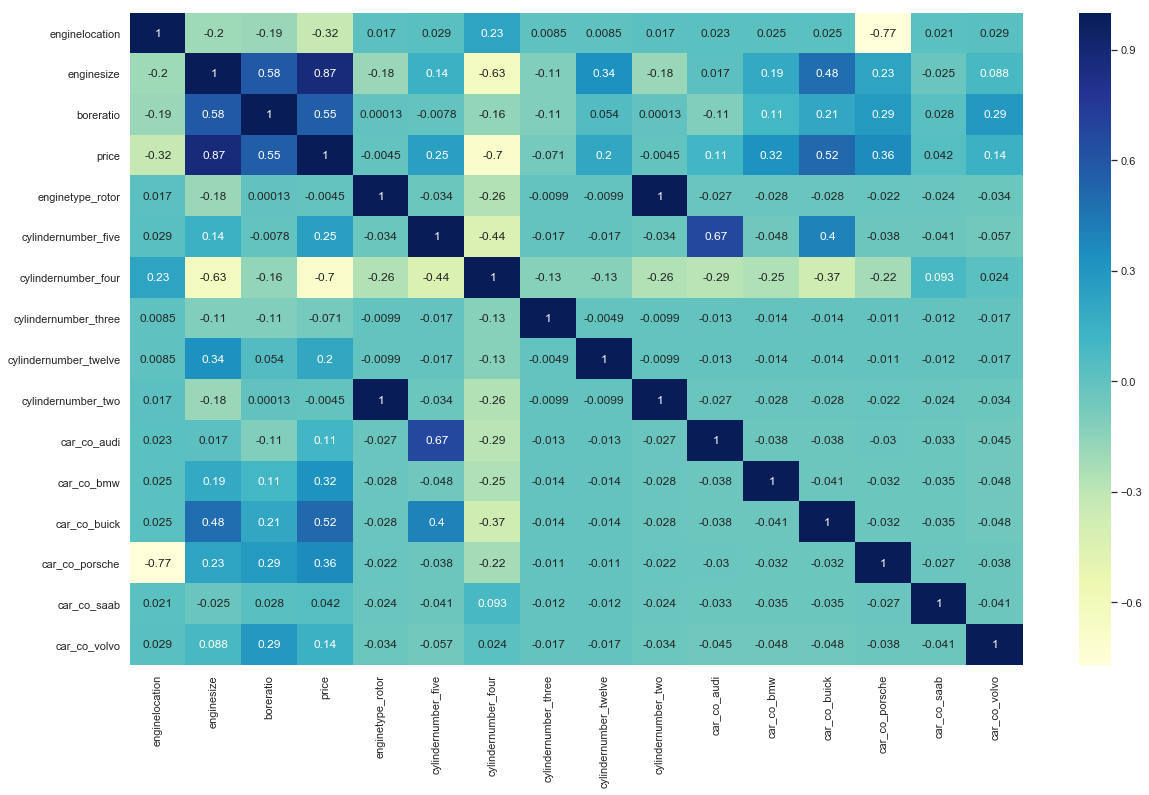

In [92]:
plt.figure(figsize = (20, 12))
sns.heatmap(df_c.corr(), annot = True, cmap="YlGnBu")
plt.rc('axes', labelsize=100)
plt.show()
#Heatmap of RFE columns and price

### Building model using statsmodel, for the detailed statistics

In [167]:
# Creating X_test dataframe with RFE selected variables
X_train_lm = X_train[col]

In [168]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_lm)

In [169]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [170]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     94.16
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           3.07e-60
Time:                        16:31:40   Log-Likelihood:                 190.31
No. Observations:                 143   AIC:                            -350.6
Df Residuals:                     128   BIC:                            -306.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.02

In [102]:
X_train_lm.columns

Index(['const', 'enginelocation', 'enginesize', 'boreratio',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'car_co_audi', 'car_co_bmw', 'car_co_buick', 'car_co_porsche',
       'car_co_saab', 'car_co_volvo'],
      dtype='object')

In [171]:
X_train_lm= X_train_lm.drop(['const'], axis=1)

In [172]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginetype_rotor,inf
8,cylindernumber_two,inf
0,enginelocation,51.660000
1,enginesize,33.030000
5,cylindernumber_four,28.830000
2,boreratio,21.280000
4,cylindernumber_five,5.110000
9,car_co_audi,3.410000
11,car_co_buick,2.310000
7,cylindernumber_twelve,1.740000


High Multicollinearity - rotor and cylunder_two are perfectly correlated

### Rebuilding the model without `cylindernumber_two`. Model 1

In [173]:
#Since rotor and cylunder_two are perfectly correlated we will drop one
X_train_lm1= X_train_lm.drop(["cylindernumber_two"], axis = 1)

In [174]:
df_c=df_c.drop(["cylindernumber_two"], axis = 1)

In [175]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm1 = sm.add_constant(X_train_lm1)

In [176]:
lm1 = sm.OLS(y_train,X_train_lm1).fit()   # Running the linear model

In [177]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     94.16
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           3.07e-60
Time:                        16:32:00   Log-Likelihood:                 190.31
No. Observations:                 143   AIC:                            -350.6
Df Residuals:                     128   BIC:                            -306.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.02

In [178]:
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [179]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginelocation,51.66
1,enginesize,33.03
5,cylindernumber_four,28.83
2,boreratio,21.28
4,cylindernumber_five,5.11
8,car_co_audi,3.41
3,enginetype_rotor,3.26
10,car_co_buick,2.31
7,cylindernumber_twelve,1.74
6,cylindernumber_three,1.44


In [ ]:
### Rebuilding the model without `cylindernumber_five`. Model 2

In [180]:
#`cylindernumber_five` is insignificant in presence of other variables.
X_train_lm2 = X_train_lm1.drop(["cylindernumber_five"], axis = 1)

In [181]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm2 = sm.add_constant(X_train_lm2)

In [182]:
lm2 = sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model

In [183]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     100.3
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           8.76e-61
Time:                        16:32:19   Log-Likelihood:                 189.10
No. Observations:                 143   AIC:                            -350.2
Df Residuals:                     129   BIC:                            -308.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

In [ ]:
#R2 AIC and BIC are similar. Small improvement in Fstatictics

In [184]:
X_train_lm2 = X_train_lm2.drop(['const'], axis=1)

In [185]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginelocation,43.10
1,enginesize,27.30
4,cylindernumber_four,23.45
2,boreratio,19.03
3,enginetype_rotor,2.81
6,cylindernumber_twelve,1.65
7,car_co_audi,1.55
9,car_co_buick,1.40
5,cylindernumber_three,1.36
8,car_co_bmw,1.32


Fstat gets better. VIF is still high.  Lets remove the most insignificant feature - boreratio

### Rebuilding the model without `boreratio`. Model 3

In [186]:
#`boreratio` is insignificant in presence of other variables.
X_train_lm3 = X_train_lm2.drop(["boreratio"], axis = 1)

In [187]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm3 = sm.add_constant(X_train_lm3)

In [188]:
lm3 = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model

In [189]:
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     107.7
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           2.16e-61
Time:                        16:33:04   Log-Likelihood:                 188.03
No. Observations:                 143   AIC:                            -350.1
Df Residuals:                     130   BIC:                            -311.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.02

In [190]:
X_train_lm3 = X_train_lm3.drop(['const'], axis=1)

In [191]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginelocation,39.35
3,cylindernumber_four,15.47
1,enginesize,13.15
2,enginetype_rotor,1.95
6,car_co_audi,1.48
5,cylindernumber_twelve,1.43
8,car_co_buick,1.40
7,car_co_bmw,1.29
4,cylindernumber_three,1.28
9,car_co_porsche,1.25


### Rebuilding the model without `cylindernumber_four`. Model 4

In [215]:
#`cylindernumber_four` is insignificant in presence of other variables and high VIF
X_train_lm4 = X_train_lm3.drop(["cylindernumber_four"], axis = 1)

In [216]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm4 = sm.add_constant(X_train_lm4)

In [217]:
lm4 = sm.OLS(y_train,X_train_lm4).fit()   # Running the linear model

In [218]:
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     117.2
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           3.63e-62
Time:                        16:40:54   Log-Likelihood:                 187.33
No. Observations:                 143   AIC:                            -350.7
Df Residuals:                     131   BIC:                            -315.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.05

In [219]:
X_train_lm4 = X_train_lm4.drop(['const'], axis=1)

In [220]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,6.70
0,enginelocation,4.81
4,cylindernumber_twelve,1.37
7,car_co_buick,1.36
6,car_co_bmw,1.19
8,car_co_porsche,1.19
2,enginetype_rotor,1.10
10,car_co_volvo,1.10
5,car_co_audi,1.06
3,cylindernumber_three,1.03


No major change in R2, AIC, BIC. Stat is increased and VIF is  reduced. lets remove next insignificant feature - cylindernumber_three

### Rebuilding the model without `cylindernumber_three`. Model 5 

In [225]:
#`cylindernumber_three` is insignificant in presence of other variables.
X_train_lm5 = X_train_lm4.drop(["cylindernumber_three"], axis = 1)

In [226]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm5 = sm.add_constant(X_train_lm5)

In [227]:
lm5 = sm.OLS(y_train,X_train_lm5).fit()   # Running the linear model

In [228]:
#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     128.4
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           6.04e-63
Time:                        16:41:27   Log-Likelihood:                 186.61
No. Observations:                 143   AIC:                            -351.2
Df Residuals:                     132   BIC:                            -318.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.05

In [229]:
X_train_lm5 = X_train_lm5.drop(['const'], axis=1)

In [230]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,6.54
0,enginelocation,4.65
3,cylindernumber_twelve,1.36
6,car_co_buick,1.35
5,car_co_bmw,1.19
7,car_co_porsche,1.19
2,enginetype_rotor,1.10
9,car_co_volvo,1.10
4,car_co_audi,1.06
8,car_co_saab,1.03


### Rebuilding the model without `cylindernumber_twelve`. Model 6

In [231]:
#`cylindernumber_twelve` is insignificant in presence of other variables.
X_train_lm6 = X_train_lm5.drop(["cylindernumber_twelve"], axis = 1)

In [232]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm6 = sm.add_constant(X_train_lm6)

In [233]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm6 = sm.add_constant(X_train_lm6)

In [234]:
lm6 = sm.OLS(y_train,X_train_lm6).fit()   # Running the linear model

In [235]:
#Let's see the summary of our linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     141.3
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           1.39e-63
Time:                        16:41:51   Log-Likelihood:                 185.48
No. Observations:                 143   AIC:                            -351.0
Df Residuals:                     133   BIC:                            -321.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0682      0.085  

In [236]:
X_train_lm6 = X_train_lm6.drop(['const'], axis=1)

In [237]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,4.85
0,enginelocation,3.94
5,car_co_buick,1.26
4,car_co_bmw,1.15
6,car_co_porsche,1.14
2,enginetype_rotor,1.08
8,car_co_volvo,1.08
3,car_co_audi,1.05
7,car_co_saab,1.03


Fstat further improves reached 141 from 128. VIF is below 5 - negligible multicolinearity. Adjusted R2 still high - good model. Lets remove last insignificant feature - enginelocation.

### Rebuilding the model without `enginelocation' . Model 7

In [238]:
X_train_lm7 = X_train_lm6.drop(['enginelocation'], axis = 1)

In [239]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm7 = sm.add_constant(X_train_lm7)

In [240]:
lm7 = sm.OLS(y_train,X_train_lm7).fit()   # Running the linear model

In [241]:
#Let's see the summary of our linear model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           4.02e-64
Time:                        16:42:52   Log-Likelihood:                 184.05
No. Observations:                 143   AIC:                            -350.1
Df Residuals:                     134   BIC:                            -323.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0699      0.012  

In [242]:
X_train_lm7 = X_train_lm7.drop(['const'], axis=1)

In [243]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,1.56
4,car_co_buick,1.19
3,car_co_bmw,1.13
5,car_co_porsche,1.08
7,car_co_volvo,1.08
2,car_co_audi,1.05
6,car_co_saab,1.02
1,enginetype_rotor,1.00


This looks the optimum model. Has high R2 anf Fstat. VIF is less than 2

### The highest coefficient is of enginesize - most important predictor. Other features like car companies which are premium has an impact (look back at box plot). Higher premium cars generally have higher coefficient among car companies. Enginetype rotor also has impact over baseline model but I beleive this is a minor effect as there are only about 2% or cars which are rotor type.

In [244]:
# Adding a constant variable back for residual analysis
import statsmodels.api as sm  
X_train_lm7 = sm.add_constant(X_train_lm7)

In [245]:
lm7 = sm.OLS(y_train,X_train_lm7).fit()   # Running the linear model

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [248]:
y_train_pred = lm7.predict(X_train_lm7)

In [249]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

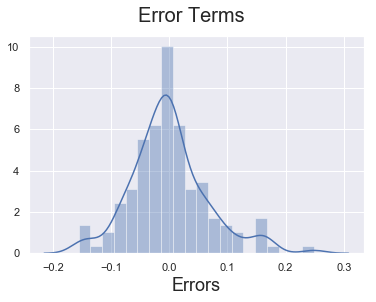

In [250]:
# Plot the histogram of the error terms. ok - centered at zero. The tails have a slight hump. 
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'y_train_pred')

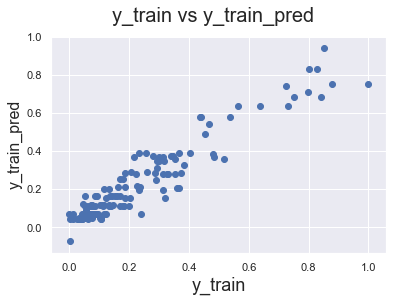

In [251]:
# Plotting v and y_train_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                               # X-label
plt.ylabel('y_train_pred', fontsize=16)                          # Y-label

## Making Predictions

#### Applying the scaling on the test sets

In [252]:
df_test= pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)

In [253]:
df_test.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,car_co_nissan,car_co_peugeot,car_co_plymouth,car_co_porsche,car_co_renault,car_co_saab,car_co_subaru,car_co_toyota,car_co_volkswagen,car_co_volvo
0,0.4,1.0,1.0,0.0,1.0,0.409756,0.460177,0.139623,0.404762,0.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.8,1.0,1.0,0.0,1.0,0.497561,0.699115,0.181132,0.404762,0.611111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.6,1.0,1.0,1.0,1.0,0.596748,0.522124,0.230189,0.563492,0.606061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.6,1.0,1.0,1.0,1.0,0.448780,0.424779,0.139623,0.444444,0.449495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.8,1.0,1.0,1.0,1.0,0.263415,0.699115,0.177358,0.746032,0.227273,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Dividing into X_test and y_test

In [254]:
y_test = df_test.pop('price')
X_test = df_test

In [255]:
X_train_lm7 = X_train_lm7.drop(['const'], axis=1)

In [257]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_lm7.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [258]:
# Making predictions
y_pred = lm7.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

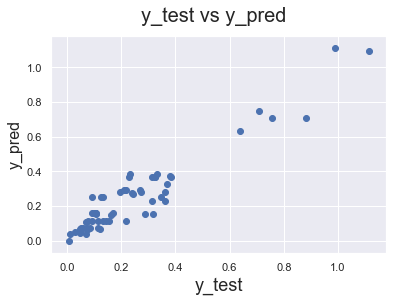

In [259]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [260]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

#R2 is high in test data. The model seems optimal

0.9053256288000182

In [1]:
df1=pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/wkyk2AWYdJbqgXoRo3Y8w42nX/test.csv')

NameError: name 'pd' is not defined